In [2]:
import mysql.connector
import pandas as pd

# Connect to the MySQL database
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='lotech'
)
cursor = cnx.cursor()



In [3]:
query = """
select product_code, count(order_details.id) as Count , products.model_name , products.manufacturer_id , products.category_id , products.screen_id , products.CPU_id , products.RAM_id , products.Storage , products.GPU_id, products.OS_id , products.OS_id , products.price
from products
join order_details on order_details.product_code = products.code
group by product_code;
"""
cpu_query = """ select  CPU_id, CPU.additional , count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join CPU on products.CPU_id = CPU.id
group by CPU_id;
"""
cursor.execute(cpu_query)
cpu_rows = cursor.fetchall()

gpu_query = """ select  GPU_id, GPU.additional , count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join GPU on products.GPU_id = GPU.id
group by GPU_id;
"""
cursor.execute(gpu_query)
gpu_rows = cursor.fetchall()

ram_query =  """ select  RAM_id, RAM.capacity , count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join RAM on products.RAM_id = RAM.id
group by RAM_id;
"""
cursor.execute(ram_query)
ram_rows = cursor.fetchall()

manufacturer_query = """ select  manufacturer_id , manufacturers.Name,  count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join manufacturers on products.manufacturer_id = manufacturers.id
group by manufacturer_id;
"""
cursor.execute(manufacturer_query)
manufacturer_rows = cursor.fetchall()

os_query = """ select  os_id , os.type , os.version ,   count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join os on products.OS_id = os.id
group by os_id;
"""
cursor.execute(os_query)
os_rows = cursor.fetchall()

category_query = """select  category_id , category.name ,    count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join category on products.category_id = category.id
group by category_id;
"""
cursor.execute(category_query)
category_rows = cursor.fetchall()

screen_query = """select  screen_id , screen.size , screen.screen_type ,    count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
join screen on products.screen_id = screen.id
group by screen_id;
"""
cursor.execute(screen_query)
screen_rows = cursor.fetchall()

storage_query = """select storage , count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
group by storage;
"""
cursor.execute(storage_query)
storage_rows = cursor.fetchall()



In [4]:
weight_query = """select weight , count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
group by weight;
"""
cursor.execute(weight_query)
weight_rows = cursor.fetchall()

price_query = """select products.price , count(order_details.id) as Count
from products
join order_details on order_details.product_code = products.code
group by products.price;
 """
cursor.execute(price_query)
price_rows = cursor.fetchall()

cursor.close()
cnx.close()

In [5]:
cpu_df = pd.DataFrame(cpu_rows , columns=['id', 'name' ,'Count'])
gpu_df = pd.DataFrame(gpu_rows , columns=['id', 'name' ,'Count'])
ram_df = pd.DataFrame(ram_rows , columns=['id', 'name' ,'Count'])
manufacturer_df = pd.DataFrame(manufacturer_rows , columns=['id', 'name' ,'Count'])
os_df = pd.DataFrame(os_rows , columns=['id', 'type' , 'version','Count'])
category_df = pd.DataFrame(category_rows , columns=['id', 'name' ,'Count'])
screen_df = pd.DataFrame(screen_rows , columns=['id', 'size' , 'type' ,'Count'])
storage_df = pd.DataFrame(storage_rows , columns=['name' ,'Count'])
weight_df = pd.DataFrame(weight_rows , columns=['name' ,'Count'])
price_df = pd.DataFrame(price_rows , columns=[ 'name' ,'Count'])

In [21]:
df = pd.DataFrame(cpu_df['Count'])
df.rename(columns={'Count' : 'CPU'} , inplace=True)
df['GPU'] = gpu_df['Count']
df['RAM'] = ram_df['Count']
df['manufacturer'] = manufacturer_df['Count']
df['OS'] = os_df['Count']
df['category'] = category_df['Count']
df['screen'] = screen_df['Count']
df['storage'] = storage_df['Count']
df['weight'] = weight_df['Count']
df

df.to_csv('request_9.csv' , index=False)

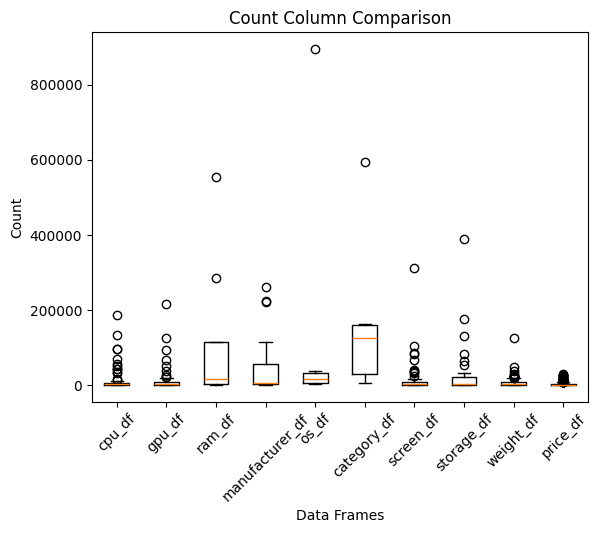

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the DataFrames and their respective Count columns
data_frames = [cpu_df, gpu_df, ram_df, manufacturer_df, os_df, category_df, screen_df, storage_df, weight_df, price_df]
count_columns = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count']

# Create a list to store all the Count columns
count_values = []
data_frame_names = ['cpu_df', 'gpu_df', 'ram_df', 'manufacturer_df', 'os_df', 'category_df', 'screen_df', 'storage_df', 'weight_df', 'price_df']


# Iterate over the DataFrames and Count columns
for df, count_col in zip(data_frames, count_columns):
    count_values.append(df[count_col])

# Visualize the Count columns using boxplot
fig, ax = plt.subplots()
ax.boxplot(count_values, labels=data_frame_names)
ax.set_xlabel('Data Frames')
ax.set_ylabel('Count')
ax.set_title('Count Column Comparison')
plt.xticks(rotation=45)
plt.show()

In [8]:
import numpy as np

# Define the DataFrames and their respective Count columns
data_frames = [cpu_df, gpu_df, ram_df, manufacturer_df, os_df, category_df, screen_df, storage_df, weight_df, price_df]
data_frame_names = ['cpu_df', 'gpu_df', 'ram_df', 'manufacturer_df', 'os_df', 'category_df', 'screen_df', 'storage_df', 'weight_df', 'price_df']
count_columns = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count']

# Calculate the coefficient of variation (CV) for each Count column
cv_values = []
for df, count_col in zip(data_frames, count_columns):
    cv = np.std(df[count_col]) / np.mean(df[count_col])
    cv_values.append(cv)

# Find the Count column with the highest CV value
highest_cv_index = np.argmax(cv_values)
highest_cv_dataframe_index = highest_cv_index
highest_cv_column = count_columns[highest_cv_index]

# Print the DataFrame and column name with the highest CV
print("The DataFrame with the highest coefficient of variation is:", data_frame_names[highest_cv_dataframe_index])
print("The column name with the highest coefficient of variation is:", highest_cv_column)
data_frames[highest_cv_dataframe_index]

The DataFrame with the highest coefficient of variation is: screen_df
The column name with the highest coefficient of variation is: Count


,id,size,type,Count
0,1,15.6,Full HD 1920x1080,312665
1,2,13.3,IPS Panel Full HD / Touchscreen 1920x1080,37941
2,3,15.6,IPS Panel Full HD 1920x1080,102940
3,4,13.3,IPS Panel Full HD 1920x1080,39629
4,5,14.0,Full HD 1920x1080,82936
...,...,...,...,...
62,81,11.6,IPS Panel Full HD / Touchscreen 1920x1080,206
63,82,18.4,Full HD 1920x1080,76
64,84,14.0,IPS Panel Full HD 1920x1200,91
65,85,14.1,1366x768,114


In [9]:
cv_values

[2.455051159366608,
 2.446699456972033,
 1.58294055728893,
 1.5779711484284091,
 2.4469062944329085,
 1.176894673931223,
 2.7754620723026022,
 2.2814678055397293,
 1.830288811856583,
 1.5269058908573405]

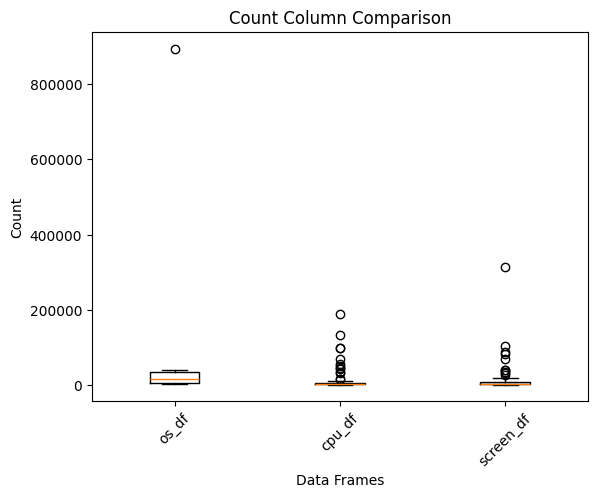

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the DataFrames and their respective Count columns
data_frames = [cpu_df, gpu_df, ram_df, manufacturer_df, os_df, category_df, screen_df, storage_df, weight_df, price_df]
count_columns = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count']
data_frame_names = ['cpu_df', 'gpu_df', 'ram_df', 'manufacturer_df', 'os_df', 'category_df', 'screen_df', 'storage_df', 'weight_df', 'price_df']

# Calculate the coefficient of variation (CV) for each Count column
cv_values = []
for df, count_col in zip(data_frames, count_columns):
    cv = np.std(df[count_col]) / np.mean(df[count_col])
    cv_values.append(cv)

# Find the indices of the three highest CV values
highest_cv_indices = np.argsort(cv_values)[-3:]

# Get the corresponding DataFrames, Count columns, and names
highest_cv_dataframes = [data_frames[i] for i in highest_cv_indices]
highest_cv_columns = [count_columns[i] for i in highest_cv_indices]
highest_cv_names = [data_frame_names[i] for i in highest_cv_indices]

# Visualize the Count columns using boxplots
fig, ax = plt.subplots()
ax.boxplot([df[col] for df, col in zip(highest_cv_dataframes, highest_cv_columns)],
           labels=highest_cv_names)
ax.set_xlabel('Data Frames')
ax.set_ylabel('Count')
ax.set_title('Count Column Comparison')
plt.xticks(rotation=45)
plt.show()

In [11]:
cv = pd.DataFrame(cv_values)

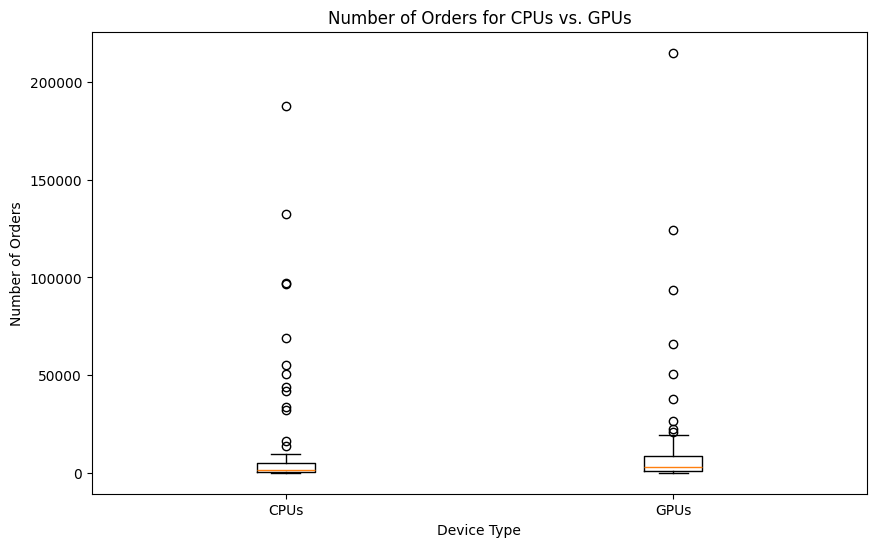

In [12]:
# Create box plots for CPUs and GPUs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(10, 6))
plt.boxplot([cpu_df['Count'], gpu_df['Count']], labels=['CPUs', 'GPUs'])
plt.title('Number of Orders for CPUs vs. GPUs')
plt.xlabel('Device Type')
plt.ylabel('Number of Orders')
plt.show()

In [17]:
cv.rename(columns={ 0: 'CV'} , inplace=True)
cv['feature'] = ['cpu', 'gpu', 'ram', 'manufacturer', 'os', 'category', 'screen', 'storage', 'weight', 'price']
cv = cv.head(9)
cv

,CV,feature
0,2.455051,cpu
1,2.446699,gpu
2,1.582941,ram
3,1.577971,manufacturer
4,2.446906,os
5,1.176895,category
6,2.775462,screen
7,2.281468,storage
8,1.830289,weight


In [19]:
cv.to_csv("9_cv.csv", index=False)